
<center><img src="https://raw.githubusercontent.com/dimitreOliveira/MachineLearning/master/Kaggle/APTOS%202019%20Blindness%20Detection/aux_img.png"></center>

Project: Real Time Diabetic Retinopathy detection using CNN

Dataset: https://www.kaggle.com/datasets/sovitrath/diabetic-retinopathy-224x224-gaussian-filtered



Author: Samiul Bari

**Importing All Necessary Modules and Packages**

In [ ]:
import cv2
import pandas
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
import PIL
import plotly
import plotly.express as px

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,Input,ZeroPadding2D,BatchNormalization,Activation
from tensorflow.keras.metrics import BinaryAccuracy, Precision, Recall
from tensorflow.keras.layers.experimental import preprocessing

from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import time
import datetime

**Importing the dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

# Specify the path to the zip file
zip_file_path = '/content/drive/MyDrive/archive (6).zip'

# Specify the directory where you want to extract the contents
extracted_folder_path = 'new_data'

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all contents to the specified directory
    zip_ref.extractall(extracted_folder_path)

print(f"File '{zip_file_path}' has been successfully extracted to '{extracted_folder_path}'.")

File '/content/drive/MyDrive/archive (6).zip' has been successfully extracted to 'new_data'.


In [ ]:
#Locate the file in Personal Machine
path = '/content/new_data/gaussian_filtered_images/gaussian_filtered_images'

In [ ]:
No_DR_Img = os.listdir(path + '/No_DR/')
Mild_Img = os.listdir(path + '/Mild/')
Moderate_Img = os.listdir(path + '/Moderate/')
Proliferate_DR_Img = os.listdir(path + '/Proliferate_DR/')
Severe_Img = os.listdir(path + '/Severe/')

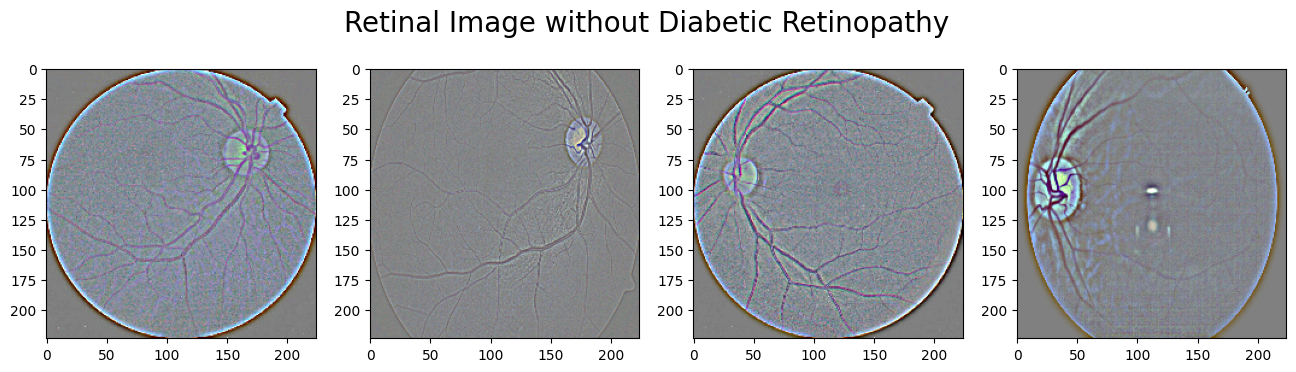

In [ ]:
#Viewing the dataset
fig = plt.figure(figsize=(16,4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(path+'/No_DR/'+ No_DR_Img[i])
    plt.imshow(img)
plt.suptitle("Retinal Image without Diabetic Retinopathy",fontsize=20)
plt.show()

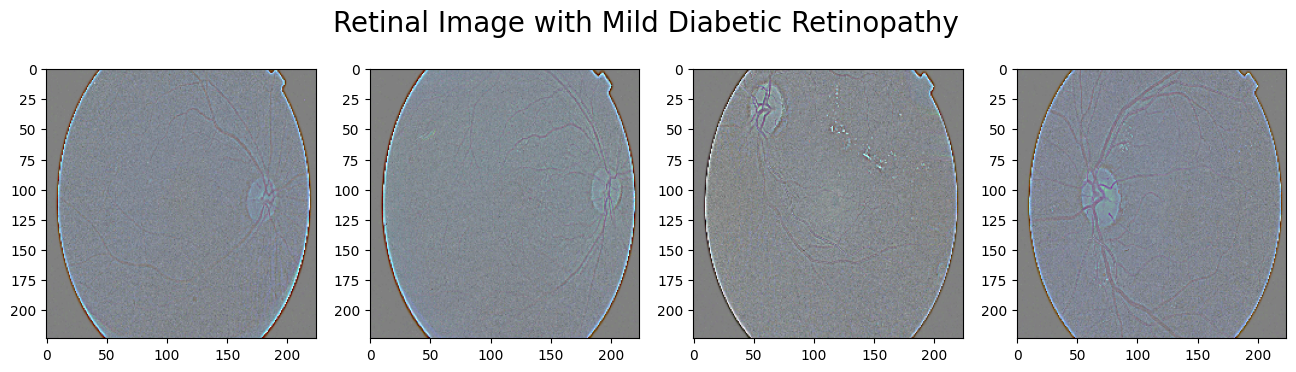

In [ ]:
#Viewing the dataset
fig = plt.figure(figsize=(16,4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(path+'/Mild/'+ Mild_Img[i])
    plt.imshow(img)
plt.suptitle("Retinal Image with Mild Diabetic Retinopathy",fontsize=20)
plt.show()

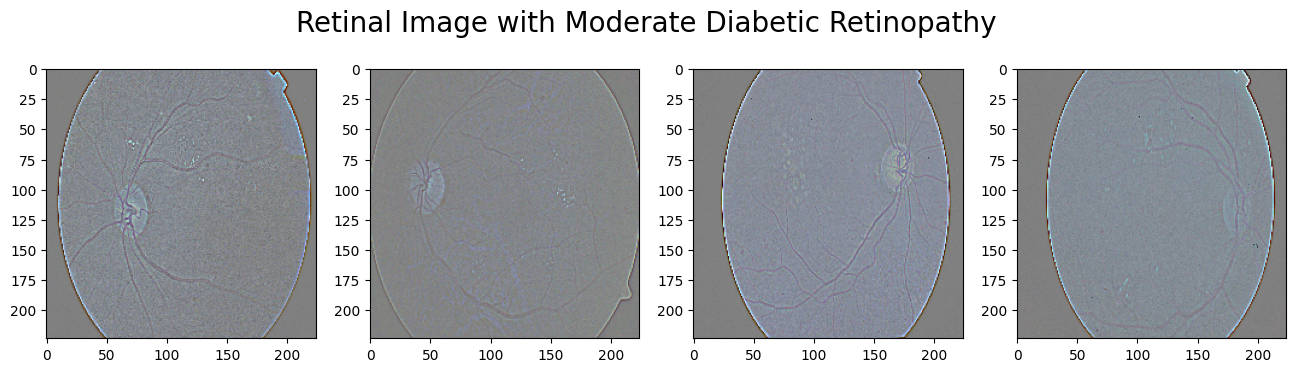

In [ ]:
#Viewing the dataset
fig = plt.figure(figsize=(16,4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(path+'/Moderate/'+ Moderate_Img[i])
    plt.imshow(img)
plt.suptitle("Retinal Image with Moderate Diabetic Retinopathy",fontsize=20)
plt.show()

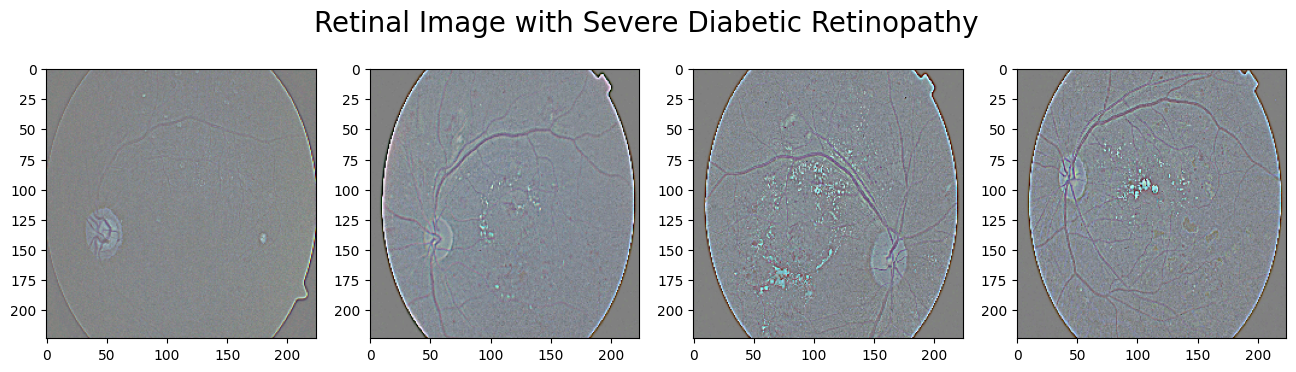

In [ ]:
#Viewing the dataset
fig = plt.figure(figsize=(16,4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(path+'/Severe/'+ Severe_Img[i])
    plt.imshow(img)
plt.suptitle("Retinal Image with Severe Diabetic Retinopathy",fontsize=20)
plt.show()

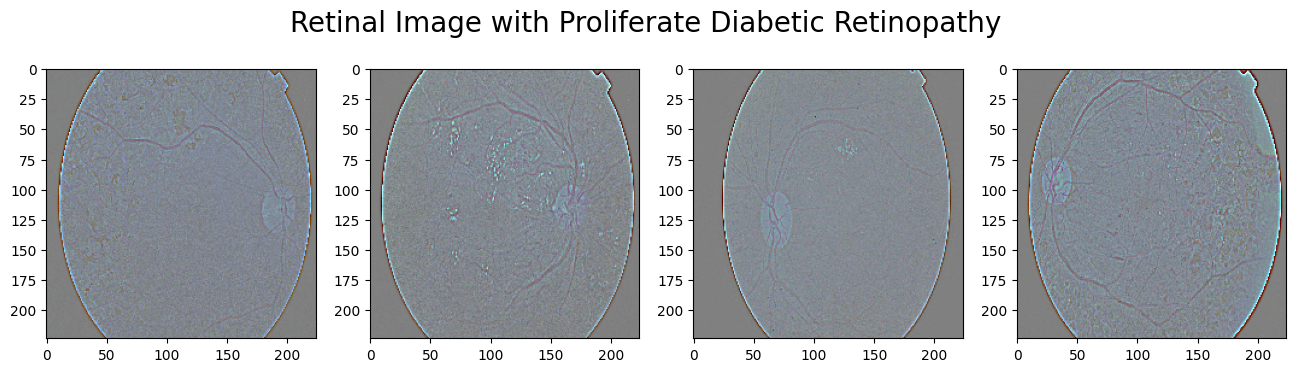

In [ ]:
#Viewing the dataset
fig = plt.figure(figsize=(16,4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(path+'/Proliferate_DR/'+ Proliferate_DR_Img[i])
    plt.imshow(img)
plt.suptitle("Retinal Image with Proliferate Diabetic Retinopathy",fontsize=20)
plt.show()

In [ ]:
Classes = {'No_DR':0, 'Mild':1, 'Moderate':2, 'Severe':3, 'Proliferate_DR':4}

**Data PreProcessing**

In [ ]:
#Normalizing pixel values
X = []
y = []
for i in Classes:
    folder_path ='/content/new_data/gaussian_filtered_images/gaussian_filtered_images/' +i
    for j in os.listdir(folder_path):
        img = cv2.imread(folder_path+'/'+j)
        # normalize values
        img = img / 255  #-->Apply normalization because we want pixel values to be scaled to the range 0-1
        X.append(img)
        y.append(Classes[i])

In [ ]:
X = np.array(X)
y = np.array(y)

X.shape, y.shape

((3662, 224, 224, 3), (3662,))

**Dataset Analysis**

In [ ]:
#Class division

Class_series=pd.Series(y)
lis=["No_DR","Mild","Moderate","Severe","Proliferate_DR"]
DR_or_not = Class_series.value_counts().tolist()
values = [DR_or_not[0], DR_or_not[1], DR_or_not[2], DR_or_not[3], DR_or_not[4]]
fig = px.pie(values=Class_series.value_counts(), names=lis , width=800, height=400, color_discrete_sequence=["skyblue","black","pink","purple","blue"]
             ,title="percentage among the different Severities of DR")
fig.show()

In [ ]:
from imblearn.over_sampling import SMOTE
#Using SMOTE to oversample the minority class(Edema) to avoid class imbalance
sm = SMOTE(random_state = 2)
sm = SMOTE(random_state = 2)
X, y = sm.fit_resample(X.reshape(X.shape[0], -1), y.ravel())

In [ ]:
#Class division

Class_series=pd.Series(y)
lis=["No_DR","Mild","Moderate","Severe","Proliferate_DR"]
DR_or_not = Class_series.value_counts().tolist()
values = [DR_or_not[0], DR_or_not[1], DR_or_not[2], DR_or_not[3], DR_or_not[4]]
fig = px.pie(values=Class_series.value_counts(), names=lis , width=800, height=400, color_discrete_sequence=["skyblue","black","pink","purple","blue"]
             ,title="percentage among the different Severities of DR")
fig.show()

In [ ]:
X = X.reshape(X.shape[0], 224, 224, 3)

In [ ]:
# Used to clean up the memory to get rid of gurbage data
import gc
gc.collect()

13516

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=32, stratify=y)
#used stratify to balance the number of examples for each class

In [ ]:
X_train.shape

(7220, 224, 224, 3)

In [ ]:
X_test.shape

(1805, 224, 224, 3)

In [ ]:
X_train = X_train.reshape( (-1,224,224,3))
X_test = X_test.reshape((-1,224,224,3))

**Import the Model Architecture (VGG 16)**

In [ ]:
from tensorflow.keras.applications.densenet import DenseNet121

In [ ]:
vgg = DenseNet121(input_shape=(224,224,3),weights='imagenet',include_top=False)

29084464/29084464 [==============================] - 0s 0us/step


In [ ]:
vgg.trainable = True

set_trainable = False

for layer in vgg.layers:
    if layer.name == 'conv5_block16_0_bn':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
for layer in vgg.layers[:]:
  if ('bn' in layer.name):
    trainable = False

In [ ]:
from tensorflow.keras.layers import Dense,Flatten,Input,Dropout,Activation,BatchNormalization,Lambda

In [ ]:
x = Flatten()(vgg.output)
x = tf.keras.layers.Dense(128,activation='relu')(x)
x = tf.keras.layers.Dropout(0.4)(x)
prediction = Dense(5,activation='softmax')(x)

In [ ]:
from tensorflow.keras.models import Model

In [ ]:
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 230, 230, 3)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1/conv[0][0]']      

In [ ]:
gc.collect()

2111

In [ ]:
# Import and use the plot_model function
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
X=[]
y=[]

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)

In [ ]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

#Early Stopping

es = EarlyStopping(monitor='val_accuracy', min_delta = 0.005, patience=10, verbose=1, mode='auto')

#Model Check Point

mc = ModelCheckpoint(monitor='val_accuracy', filepath = 'saved_model', verbose=1, save_best_only = True, mode='auto')

cd = [es,mc]

In [ ]:
adam = keras.optimizers.Adam(learning_rate=0.00001)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer = adam,
              metrics=['accuracy']
)

In [ ]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          epochs=40,
          callbacks=cd,
          batch_size = 32,
          shuffle=True)

Epoch 1/40
226/226 [==============================] - ETA: 0s - loss: 1.2146 - accuracy: 0.5188
Epoch 1: val_accuracy improved from -inf to 0.67202, saving model to saved_model
226/226 [==============================] - 85s 308ms/step - loss: 1.2146 - accuracy: 0.5188 - val_loss: 0.8846 - val_accuracy: 0.6720
Epoch 2/40
226/226 [==============================] - ETA: 0s - loss: 0.8364 - accuracy: 0.6673
Epoch 2: val_accuracy improved from 0.67202 to 0.75235, saving model to saved_model
226/226 [==============================] - 60s 268ms/step - loss: 0.8364 - accuracy: 0.6673 - val_loss: 0.7039 - val_accuracy: 0.7524
Epoch 3/40
226/226 [==============================] - ETA: 0s - loss: 0.6790 - accuracy: 0.7436
Epoch 3: val_accuracy improved from 0.75235 to 0.79834, saving model to saved_model
226/226 [==============================] - 61s 272ms/step - loss: 0.6790 - accuracy: 0.7436 - val_loss: 0.5752 - val_accuracy: 0.7983
Epoch 4/40
226/226 [==============================] - ETA: 0s

In [ ]:
history = model.history.history
model_loss=pd.DataFrame(model.history.history)

In [ ]:
def plot_metrics(history):

    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['accuracy']
    val_acc = history['val_accuracy']

    # Loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()

     # Accuracy
    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.show()

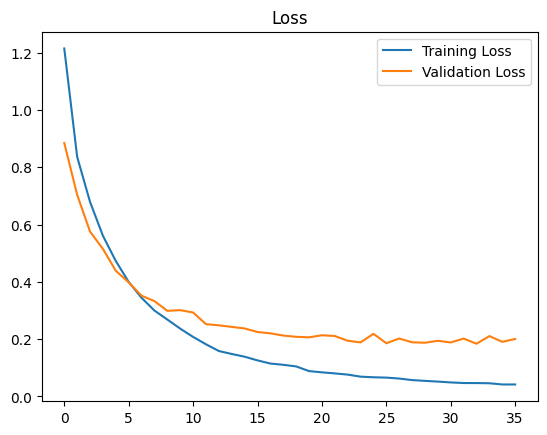

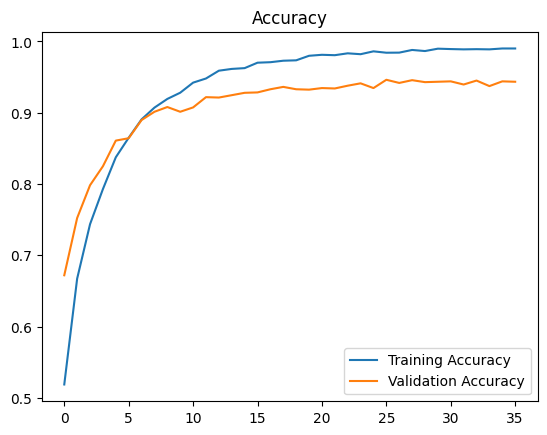

In [ ]:
plot_metrics(history)

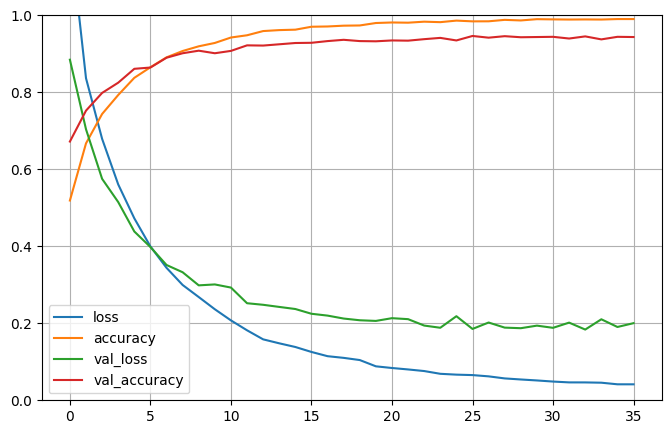

In [ ]:
model_loss.plot (figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
Model_evaluation = model.evaluate(X_train, y_train)
print(f"%\nAccuracy: {Model_evaluation[1]*100:.4f} %")

175/226 [======================>.......] - ETA: 4s - loss: 0.0172 - accuracy: 0.9948

In [ ]:
y_predicted_tf = model.predict(X_test)

In [ ]:
y_predicted_tf

In [ ]:
y_test

In [ ]:
y_predicted =[]
for i in range(1805):
    max_val = y_predicted_tf[i][0]
    classify = 0
    for j in range(5):
        if max_val<y_predicted_tf[i][j]:
            max_val = y_predicted_tf[i][j]
            classify = j
    y_predicted.append(classify)

In [ ]:
y_predicted

In [ ]:
len(y_predicted)

In [ ]:
len(y_test)

In [ ]:
df = pd.DataFrame({"Y_test": y_test , "Y_predicted" : y_predicted})
df.head(8)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score

In [ ]:
f1_score(y_test, y_predicted, average='micro')

In [ ]:
recall_score(y_test, y_predicted, average='micro')

In [ ]:
 precision_score(y_test, y_predicted, average='micro')

In [ ]:
cm = confusion_matrix(y_test, y_predicted)
print(cm)

In [ ]:
cm = confusion_matrix(y_predicted,y_test)

plt.figure(figsize=(5, 4))
ax = plt.subplot()
sns.set(font_scale=1.0)
sns.heatmap(cm, annot=True, fmt='g', cmap="Blues", ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=10);ax.set_ylabel('True labels', fontsize=10);
ax.set_title('Confusion Matrix', fontsize=10);
ax.xaxis.set_ticklabels(['No','Mild','Moderate','Severe','Proliferate'], fontsize=10); ax.yaxis.set_ticklabels(['No','Mild','Moderate','Severe','Proliferate'], fontsize=10);

# Gradio

In [ ]:
model.save('path_to_save_model.h5')

In [ ]:
pip install --upgrade tensorflow-probability


In [ ]:
pip install typing-extensions==4.5.0

In [ ]:
!pip install --upgrade tensorflow-probability
!pip install --upgrade typing-extensions

In [ ]:
!pip install -q gradio

In [ ]:
!pip install -q tensorflow

In [ ]:
pip show typing-extensions


In [ ]:
pip install --upgrade typing-extensions


In [ ]:
import gradio as gr
import tensorflow as tf
import requests
import urllib


In [ ]:
image = gr.Image()

In [ ]:
start_time = time.time()
start_time

In [ ]:
model = tf.keras.models.load_model('/content/path_to_save_model.h5')
labels = ['No_DR', 'Mild', 'Moderate', 'Proliferate_DR', 'Severe']

def classify_image(inp):
    inp = inp[None, ...]
    inp = tf.keras.applications.densenet.preprocess_input(inp)
    predictions = model.predict(inp).flatten()
    return {labels[i]: float(predictions[i]) for i in range(5)}

image = gr.Image()
label = gr.Label(num_top_classes=5)
gr.Interface(fn=classify_image, inputs=image, outputs=label).launch(share=True)


In [ ]:
end_time= datetime.datetime.now()

In [ ]:
Total_time= end_time - start_time

print(f': {'Total Time': {Total_time}')